# A1_V1_Olga_Total Intensity Analysis Summary

Ver: A1_V1

Author(s) : xx Issac Goh

Date : 250625;YYMMDD

Author notes:

In this module, xxxx

## Analysis Overview

This notebook generates results for the **normalised total-intensity analysis**, focusing on statistical characterisation of transcript intensity distributions within individual experiments and across all experiments collectively normalised against mean ribosome signal per image.

---

## Input File Guidance

* Files ending in `_1.csv`: Detected transcript signal data.
* Files ending in `_2.csv`: Detected ribosome signal data (normalisation reference).

---

## Analysis Outputs

The analysis generates the following plots and data outputs, stored in `cfg['output_path']`:

| Output File                      | Description                                                                                  |
| -------------------------------- | -------------------------------------------------------------------------------------------- |
| `per_image_hist_Area/<exp>.pdf`  | Histograms with KDE overlays of transcript spot areas per image                              |
| `global_area_distribution.pdf`   | KDE summarising transcript spot area distributions across all images                         |
| `per_image_sum_intensity.pdf`    | Barplot of total normalised intensity per image                                              |
| `per_image_median_intensity.pdf` | Barplot of median ± MAD (or mean ± SD) normalised intensity per image                        |
| `multi_violin_intensity.pdf`     | Violin plots of normalised intensity distributions per image with total intensity annotation |
| `overall_violin_intensity.pdf`   | Violin plot summarising the distribution of total intensities across images                  |
| `per_image_totals.csv`           | CSV summarising intensity metrics per image                                                  |
| `all_norm_transcripts.csv`       | CSV with normalised intensity values of all transcripts                                      |

---

## Statistical Metrics Used

| Statistic           | Description & Interpretation                                                                     |
| ------------------- | ------------------------------------------------------------------------------------------------ |
| **Mean ± SD**       | Average and standard deviation of intensity values, indicating central tendency and variability. |
| **Median ± MAD**    | Median and median absolute deviation, robust metrics less sensitive to outliers.                 |
| **Total Intensity** | Summed normalised intensity per image, representing aggregate transcript abundance.              |

---

## Interpretation Guidelines

### **Per-Image Metrics**

Each image is evaluated independently for:

* **Total Normalised Intensity:** Reflects aggregate transcript signal strength relative to ribosomal normalisation.
* **Median ± MAD (or Mean ± SD):** Provides robust and conventional estimates of typical transcript intensity within an image, with corresponding variability.

### **Across-Image (Global) Metrics**

These metrics summarise data pooled from all images:

* **Overall Violin Plot:** Displays the distribution of total intensities across all images, indicating consistency or variability in aggregate transcript levels.
* **Statistical Summaries:** Provide concise numeric representation of overall intensity trends:

  * Mean, standard deviation, median, and median absolute deviation across images.

---

## Final Notes

* Use **Total Intensity** metrics for evaluating transcript abundance per image.
* Employ **Median ± MAD** for robust insights less influenced by outliers, or **Mean ± SD** for standard parametric assessment.
* The **overall violin plot** helps visualise intensity consistency or variability across the dataset.


Processing images:   0%|                                | 0/3 [00:00<?, ?it/s]

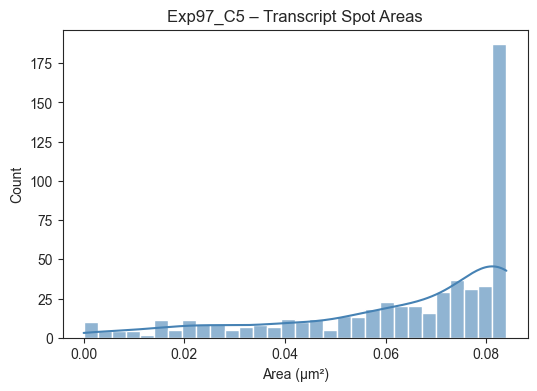

Processing images:  33%|████████                | 1/3 [00:00<00:01,  1.56it/s]

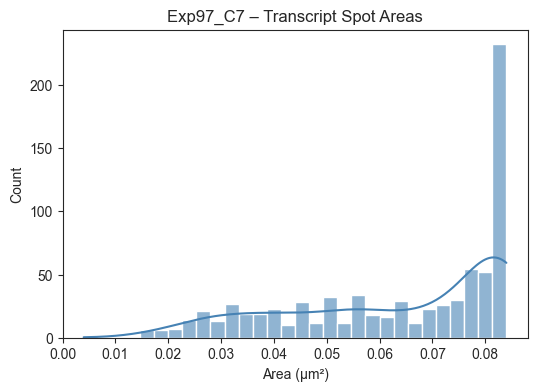

Processing images:  67%|████████████████        | 2/3 [00:01<00:00,  1.84it/s]

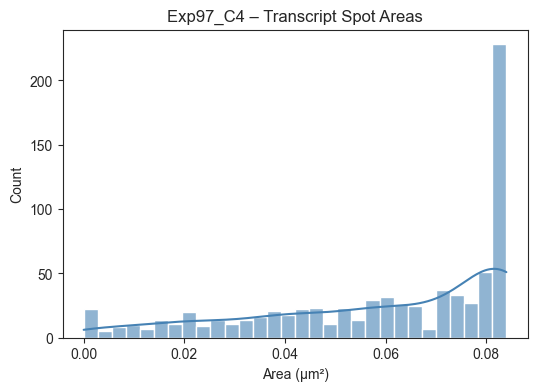

Processing images: 100%|████████████████████████| 3/3 [00:01<00:00,  2.00it/s]
/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_3463/645309388.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totals_df, x='Experiment', y='TotalIntensity', palette=cfg['palette'], edgecolor='black')


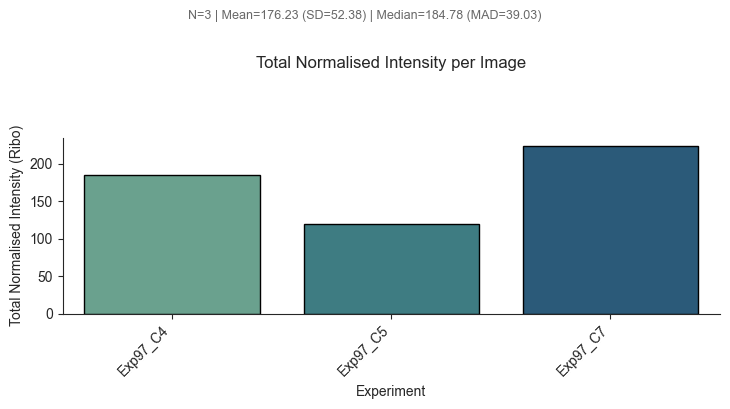

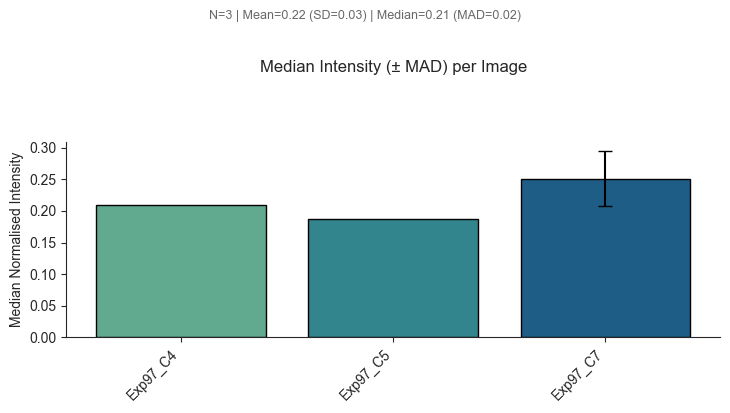

/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_3463/645309388.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=norm_tx_df, x='Experiment', y='NormIntensity', palette=cfg['palette'], inner='quartile', scale='width')
/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_3463/645309388.py:146: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data=norm_tx_df, x='Experiment', y='NormIntensity', palette=cfg['palette'], inner='quartile', scale='width')


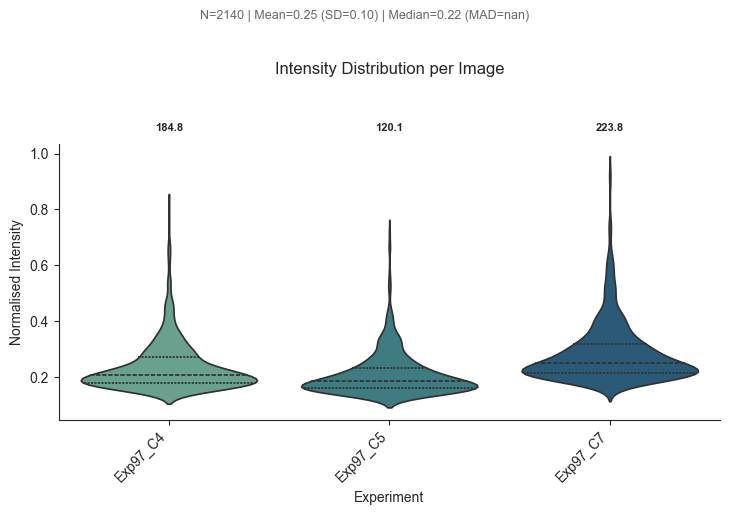

/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_3463/645309388.py:162: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(y=totals_df['TotalIntensity'], color=cfg['violin_color'], linewidth=1, width=0.5, inner="quart",bw=0.5)


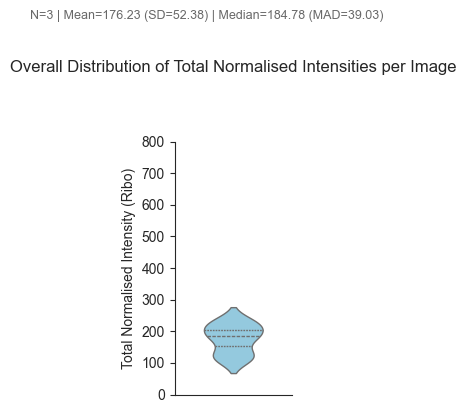

In [1]:
"""
total_intensity_analysis.py  –  v3  (2025‑06‑25)
------------------------------------------------
Normalised total-intensity analysis with upgraded visuals & simplified statistics.

Outputs (all in cfg['output_path']):
    per_image_hist_Area/<exp>.pdf          – histogram+KDE of spot areas
    global_area_distribution.pdf           – across-image area KDE
    per_image_sum_intensity.pdf            – total normalised intensity per image
    per_image_median_intensity.pdf         – median ± MAD or mean ± SD
    multi_violin_intensity.pdf             – violin (one per image) with totals
    overall_violin_intensity.pdf           – slimmer violin (all images)
    per_image_totals.csv
    all_norm_transcripts.csv
"""

# ----------------------------- Imports --------------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ------------------------- CONFIGURATION ------------------------------
cfg = {
    'input_path': './data/input/',
    'output_path': './data/output_fl/',
    'area_hist_dir': 'per_image_hist_Area',
    # --- aesthetics -------------
    'palette': 'crest',
    'violin_color': 'skyblue',
    'sns_style': 'ticks',
    # --- statistics for plots ---
    'agg_stat': 'median',  # 'median' or 'mean'
    'error_stat': 'mad',   # 'mad' or 'sd'
    # --- behaviour --------------
    'save_plots': True,
    'show_plots': True
}
os.makedirs(cfg['output_path'], exist_ok=True)
os.makedirs(os.path.join(cfg['output_path'], cfg['area_hist_dir']), exist_ok=True)
sns.set_style(cfg['sns_style'])

# -------------------- Helper functions --------------------------------
def _figsize(n=1, w=6, h=4):
    return (max(w, n * 0.8 + 5), h)

def _savefig(fname):
    if cfg['save_plots']:
        plt.savefig(os.path.join(cfg['output_path'], fname), bbox_inches='tight')
    if cfg['show_plots']:
        plt.show()
    plt.close()

def parse_files(path):
    d = {}
    for fn in os.listdir(path):
        if fn.lower().endswith('.csv'):
            parts = fn.split("_")
            key = parts[-1].split(".")[0]
            if key in {'1', '2'}:
                exp_id = "_".join(parts[:-1])
                d.setdefault(exp_id, {})[key] = pd.read_csv(os.path.join(path, fn))
    return d

def mad(series):
    return np.median(np.abs(series - np.median(series)))

def simple_summary(series):
    mean, sd = series.mean(), series.std(ddof=1)
    median, md = series.median(), mad(series)
    return f"N={len(series)} | Mean={mean:.2f} (SD={sd:.2f}) | Median={median:.2f} (MAD={md:.2f})"

# ---------------------- Main Analysis ---------------------------------
d_exp = parse_files(cfg['input_path'])
all_norm_tx, img_totals = [], []

for exp_id, dfs in tqdm(d_exp.items(), desc="Processing images"):
    if not {'1', '2'}.issubset(dfs):
        continue

    tx, rib = dfs['1'].copy(), dfs['2'].copy()

    # Histogram + KDE of spot areas
    plt.figure(figsize=_figsize())
    sns.histplot(tx['Area'].dropna(), bins=30, color='steelblue', alpha=0.6, kde=True)
    plt.title(f"{exp_id} – Transcript Spot Areas")
    plt.xlabel("Area (µm²)")
    _savefig(os.path.join(cfg['area_hist_dir'], f"{exp_id}.pdf"))

    # Normalise intensities
    norm_factor = rib['Mean'].mean()
    tx['NormIntensity'] = tx['Mean'] / norm_factor
    tx['Experiment'] = exp_id
    all_norm_tx.append(tx[['Label', 'Mean', 'NormIntensity', 'Area', 'X', 'Y', 'Experiment']])

    img_totals.append({
        'Experiment': exp_id,
        'TotalIntensity': tx['NormIntensity'].sum(),
        'MedianIntensity': tx['NormIntensity'].median(),
        'MADIntensity': mad(tx['NormIntensity']),
        'MeanIntensity': tx['NormIntensity'].mean(),
        'SDIntensity': tx['NormIntensity'].std(ddof=1)
    })


# Export CSVs
norm_tx_df = pd.concat(all_norm_tx, ignore_index=True)
norm_tx_df.to_csv(os.path.join(cfg['output_path'], "all_norm_transcripts.csv"), index=False)
totals_df = pd.DataFrame(img_totals).sort_values('Experiment')
totals_df.to_csv(os.path.join(cfg['output_path'], "per_image_totals.csv"), index=False)

# fast sorting procedure to ensure plots are same order
totals_df = totals_df.sort_values('Experiment').reset_index(drop=True)
order = list(totals_df['Experiment'].values)
norm_tx_df['Experiment'] = norm_tx_df['Experiment'].astype('category').cat.reorder_categories(order)
totals_df['Experiment'] = totals_df['Experiment'].astype('category').cat.reorder_categories(order)

# --- Total Intensity Barplot ---
plt.figure(figsize=_figsize(len(totals_df)))
sns.barplot(data=totals_df, x='Experiment', y='TotalIntensity', palette=cfg['palette'], edgecolor='black')
plt.title("Total Normalised Intensity per Image", pad=50)
plt.suptitle(simple_summary(totals_df['TotalIntensity']), fontsize=9, color='dimgray', y=1.01)
plt.ylabel("Total Normalised Intensity (Ribo)")
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
_savefig("per_image_sum_intensity.pdf")

# --- Median/Mean Intensity Barplot with Error Bars ---
stat, err = ('MedianIntensity', 'MADIntensity') if cfg['agg_stat']=='median' else ('MeanIntensity', 'SDIntensity')
plt.figure(figsize=_figsize(len(totals_df)))
plt.bar(totals_df['Experiment'], totals_df[stat], yerr=totals_df[err], capsize=5,
        color=sns.color_palette(cfg['palette'], len(totals_df)), edgecolor='black')
plt.title(f"{cfg['agg_stat'].capitalize()} Intensity (± {cfg['error_stat'].upper()}) per Image", pad=50)
plt.suptitle(simple_summary(totals_df[stat]), fontsize=9, color='dimgray', y=1.02)
plt.ylabel(f"{cfg['agg_stat'].capitalize()} Normalised Intensity")
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
_savefig("per_image_median_intensity.pdf")

# --- Multi Violin Plot ---
plt.figure(figsize=_figsize(len(totals_df), h=5))
ax = sns.violinplot(data=norm_tx_df, x='Experiment', y='NormIntensity', palette=cfg['palette'], inner='quartile', scale='width')
y_top = norm_tx_df['NormIntensity'].max() * 1.15
tot_map = totals_df.set_index('Experiment')['TotalIntensity']
for x, lab in zip(ax.get_xticks(), [t.get_text() for t in ax.get_xticklabels()]):
    ax.text(x, y_top, f"{tot_map.loc[lab]:.1f}", ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title("Intensity Distribution per Image", pad=50)
plt.suptitle(simple_summary(norm_tx_df['NormIntensity']), fontsize=9, color='dimgray', y=1.02)
plt.ylabel("Normalised Intensity")
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
_savefig("multi_violin_intensity.pdf")

# --- Overall Summary Violin Plot (sum intensities per image) ---
plt.figure(figsize=(2,4)) #(figsize=_figsize())
sns.violinplot(y=totals_df['TotalIntensity'], color=cfg['violin_color'], linewidth=1, width=0.5, inner="quart",bw=0.5)

# Statistical summary at the bottom
summary_text = simple_summary(totals_df['TotalIntensity'])

plt.title("Overall Distribution of Total Normalised Intensities per Image", pad=50)
plt.suptitle(summary_text, fontsize=9, color='dimgray', y=1.02)
plt.ylabel("Total Normalised Intensity (Ribo)")
plt.xticks([])
plt.ylim(0, 800)

sns.despine()
plt.tight_layout()
_savefig("overall_summary_violin_intensity.pdf")

/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_3463/855761632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totals_df, x='Experiment', y='TotalIntensity', palette=cfg['palette'], edgecolor='black')


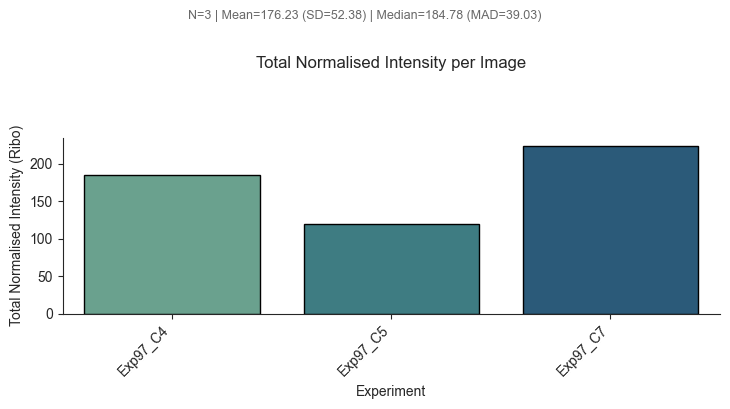

In [2]:
# --- Total Intensity Barplot ---
plt.figure(figsize=_figsize(len(totals_df)))
sns.barplot(data=totals_df, x='Experiment', y='TotalIntensity', palette=cfg['palette'], edgecolor='black')
plt.title("Total Normalised Intensity per Image", pad=50)
plt.suptitle(simple_summary(totals_df['TotalIntensity']), fontsize=9, color='dimgray', y=1.01)
plt.ylabel("Total Normalised Intensity (Ribo)")
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
_savefig("per_image_sum_intensity.pdf")